In [2]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization 
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title


from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss
# Charger le dataset depuis un fichier CSV
file_path = 'C:/Users/commu/Desktop/Sidibba/votre_nom_de_fichier.csv'  # Remplacez par le chemin de votre fichier

# Lecture du dataset
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df

,Tran Type,Amount,Bank Commission,Agence Commission,TOF,profitability
0,1,100.0,0.0,0.0,0.0,0
1,1,1000.0,0.0,0.0,0.0,0
2,3,10.0,0.0,0.0,0.0,0
3,2,300.0,0.0,0.0,0.0,0
4,2,240.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...
71538,1,200.0,0.0,0.0,0.0,0
71539,4,2600.0,0.0,0.0,0.0,0
71540,3,50.0,0.0,0.0,0.0,0
71541,1,50.0,0.0,0.0,0.0,0


In [3]:
# Check value counts of column that appear categorical accoring to above results
discrete_cols1 = ['Tran Type', 'profitability']
for col in discrete_cols1:
    print(f"{col}:\n{df[col].value_counts()}")
    print('-' * 50)


Tran Type:
Tran Type
1     37989
3     20175
5      6633
6      3598
4      2096
8       508
2       375
7       158
10        6
9         3
11        1
12        1
Name: count, dtype: int64
--------------------------------------------------
profitability:
profitability
0    66809
1     4734
Name: count, dtype: int64
--------------------------------------------------


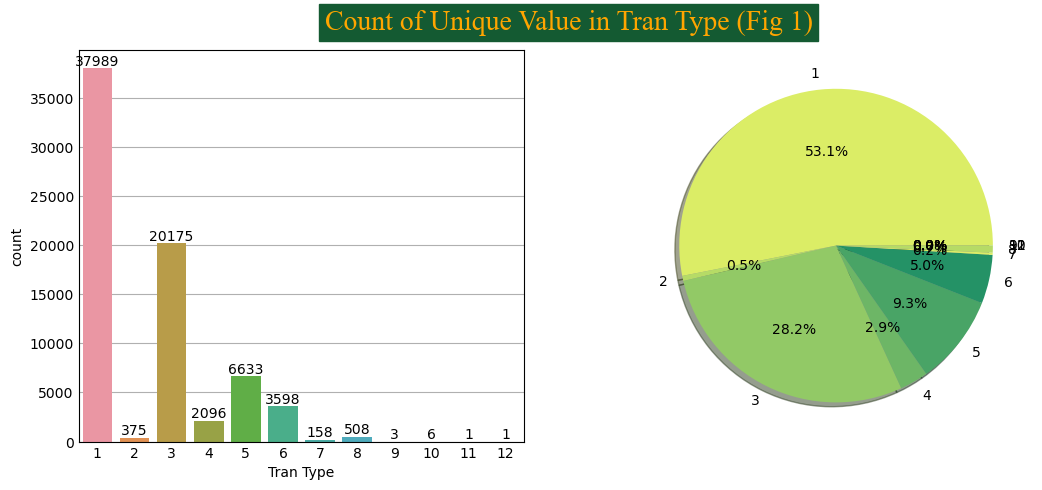

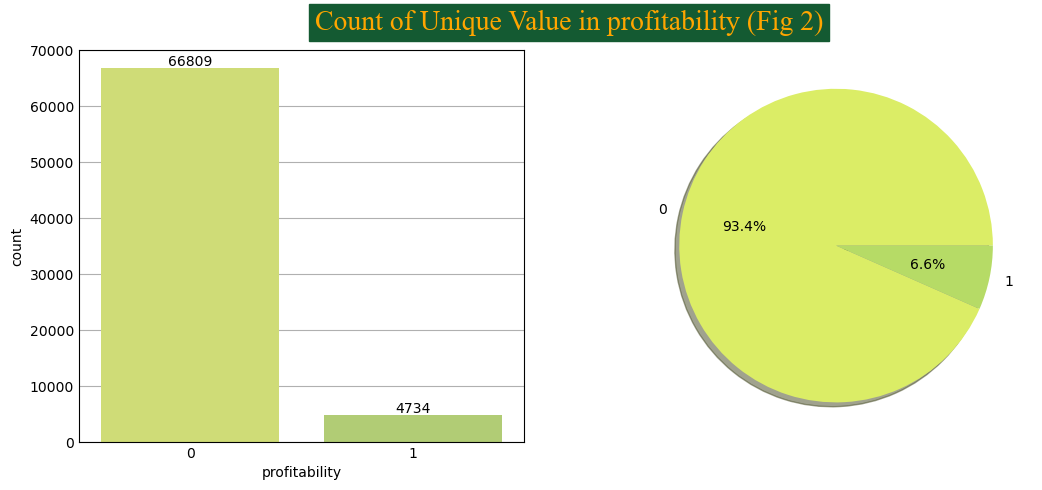

In [4]:
# univariate analysis of categorical data:
sns.set_palette("summer_r")
for i, col in enumerate(discrete_cols1):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09, **FONT)
    plt.show()


In [5]:
# univariate analysis of numerical data:
df.loc[:, ~df.columns.isin(discrete_cols1)].describe().T


,count,mean,std,min,25%,50%,75%,max
Amount,71543.0,7286.900835,93248.656582,1.000,30.0,100.0,500.0,8000000.00
Bank Commission,71543.0,0.729880,2.724889,-23.184,0.0,0.0,0.0,147.84
Agence Commission,71543.0,3.251427,13.409372,0.000,0.0,0.0,0.0,776.16
TOF,71543.0,0.307094,2.073641,0.000,0.0,0.0,0.0,176.00


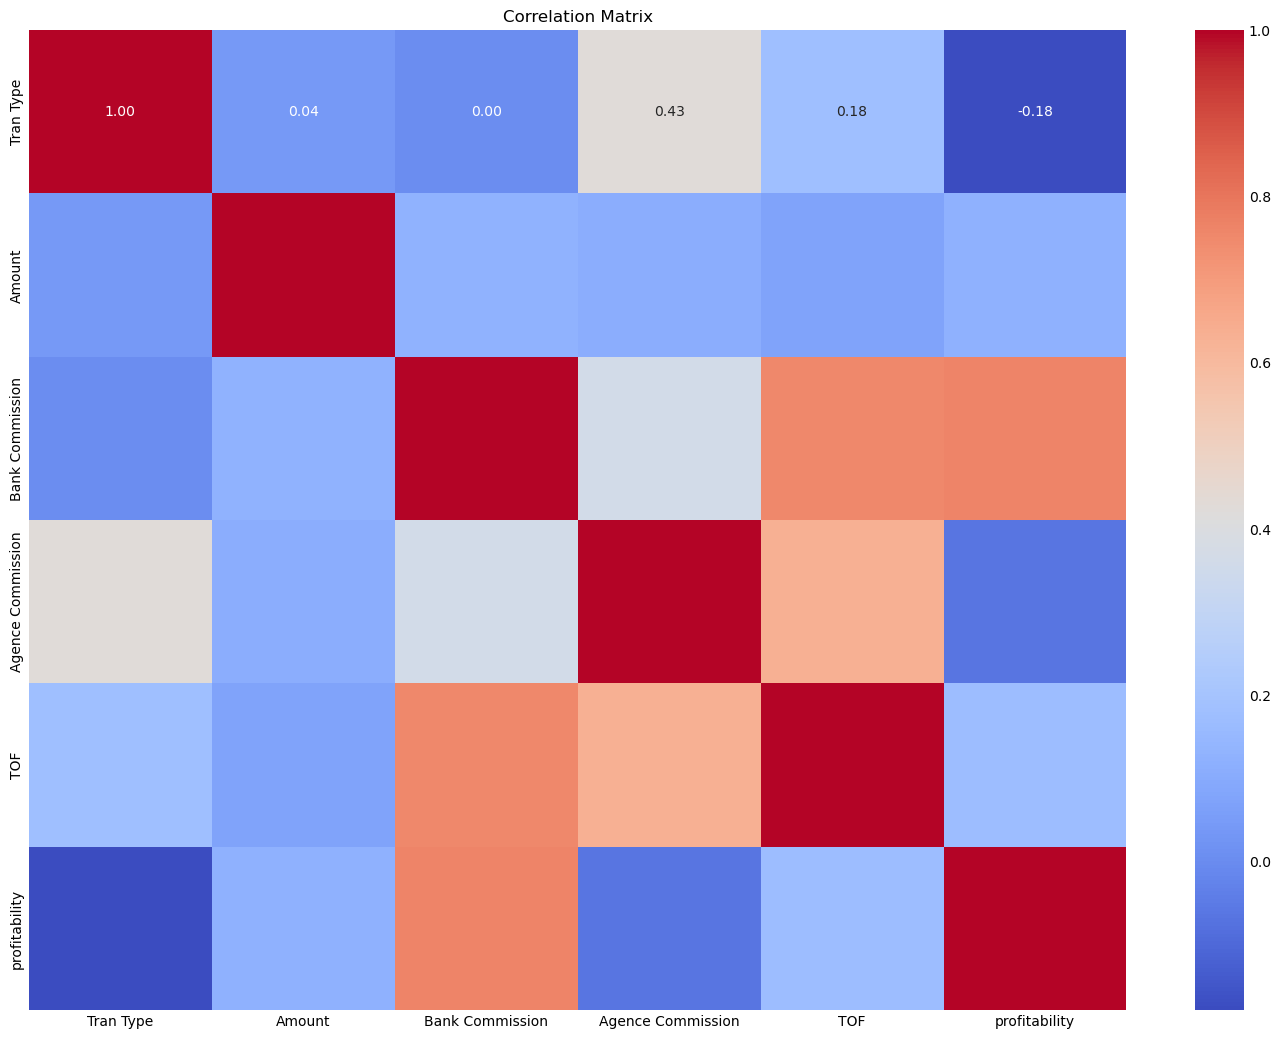

In [7]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [10]:
#Data Preprocessing
df.shape
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['profitability']), df['profitability'],
                                                    test_size=0.2,
                                                    random_state=42)
numerical_columns = [0, 2, 3, 4]
nominal_columns = [1]
ordinal_columns = []


handle_numerical = Pipeline(steps=[
    ('impyte', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

handle_nominal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder())
])

handle_ordinal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('ordinal', handle_ordinal, ordinal_columns),
    ('nominal', handle_nominal, nominal_columns)
], remainder='passthrough')


In [13]:
#Construction de modeles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
# Assuming df is your DataFrame and 'Osteoporosis' is your target column
X = df.drop(['profitability'], axis=1)
y = df['profitability']

#training and test sample :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for Model in [LogisticRegression, DecisionTreeClassifier, SVC, GradientBoostingClassifier, KNeighborsClassifier, MLPClassifier]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s:' %
          (Model.__name__)
         )
    print('classification_report:')
    print(classification_report(y_test, y_pred))
    print('confusion_matrix:')
    print(metrics.confusion_matrix(y_test, y_pred))
    print('Measures:')
    print('F1-score: %s' %
          (metrics.f1_score(y_test, y_pred, average="macro"))
         )  
    print('recall: %s' %
          (metrics.recall_score(y_test, y_pred, average="macro"))
         )
    print('precision: %s' %
          (metrics.precision_score(y_test, y_pred, average="macro"))
         )
    print('accuracy: %s' %
          (metrics.accuracy_score(y_test, y_pred))
         )


LogisticRegression:
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13351
           1       1.00      1.00      1.00       958

    accuracy                           1.00     14309
   macro avg       1.00      1.00      1.00     14309
weighted avg       1.00      1.00      1.00     14309

confusion_matrix:
[[13351     0]
 [    2   956]]
Measures:
F1-score: 0.9994400863868953
recall: 0.9989561586638831
precision: 0.9999251104620684
accuracy: 0.9998602278286394
DecisionTreeClassifier:
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13351
           1       1.00      1.00      1.00       958

    accuracy                           1.00     14309
   macro avg       1.00      1.00      1.00     14309
weighted avg       1.00      1.00      1.00     14309

confusion_matrix:
[[13351     0]
 [    0   958]]
Measures:
F1-score: 1.0
recall: 1